<a href="https://colab.research.google.com/github/dmachlanski/iads-summer-school-causality-2022/blob/main/labs/Exercise_IHDP%20-%20completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Inference - Exercise (IHDP)

This is an opportunity for everyone to put into practice everything we have learnt so far. The data for this exercise comes from Infant Health Development Program study and was modified specifically for causal inference estimation purposes. More precisely, this dataset was formally introduced by [Hill (2011)](https://doi.org/10.1198/jcgs.2010.08162). It is a commonly used semi-simulated dataset in the CI community that combines pre-treatment covariates (X) and treatment assignments (T) from a real study, and simulated outcomes (Y). Because all outcomes are generated (both $y_1$ and $y_0$), we can measure individual as well as average treatment effect errors. For training purposes, only one of the outcomes is available to the estimator. The other is hidden and used only for evaluation purposes.

The experiment where the covariates come from measured various aspects of premature infants and their mothers, and how receiving specialised childcare affected the cognitive test score of the infants later on. The treatment groups are made imbalanced by removing a subset of the treated individuals. The variables are a mixture of contonuous and binary features. Treatment is binary. The outcome Y is continuous. Overall, we have 25 background features X. The data consists of 747 samples (139 treated, 608 control).

In terms of evaluation metrics, we are interested in predicting both individual and average treatment effects for this task. As the outcomes are simulated, we have access to both true outcomes $\mathcal{Y}_1$ and $\mathcal{Y}_0$ for each individual (i). As a result, we have access to true ITEs and true ATE:

$$ITE^{(i)} = \mathcal{Y}_1^{(i)} - \mathcal{Y}_0^{(i)}$$

$$ATE = \mathbb{E}[ITE]$$

We can define our predictions as:

$$\widehat{ITE}^{(i)} = \hat{y}_1^{(i)} - \hat{y}_0^{(i)}$$

$$\widehat{ATE} = \frac{1}{n}\sum \limits_{i=1}^{n}\widehat{ITE}^{(i)}$$

This allows us to define measurement errors with respect to each as:

$$\epsilon_{PEHE} = \sqrt{\frac{1}{n}\sum \limits_{i=1}^{n}(\widehat{ITE}^{(i)} - ITE^{(i)})^2}$$

$$\epsilon_{ATE} = \left| \widehat{ATE} - ATE \right|$$

Where PEHE stands for Precision in Estimation of Heterogeneous Effect, and which essentially is a Root Mean Squared Error (RMSE) between predicted and true ITEs. Implementations of both metrics are provided below.

In [1]:
def rmse(a, b):
    return np.sqrt(((a - b)**2).mean())

def ate_error(pred_te, true_te):
  return np.abs(np.mean(pred_te) - np.mean(true_te))

def pehe_error(pred_te, true_te):
  return rmse(true_te, pred_te)

We suggest the following steps:
1. Import packages.
    1. Remember to install EconML if you want to use it.
2. Data.
    1. Can be accessed at the following URLs:
        1. Training: https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_train.npz
        2. Testing: https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_test.npz
    2. Use 'wget' command to download them into the notebook (or upload manually).
    3. Explore the data (print a few samples, plot distributions - see plot_dist function below).
3. Data pre-processing.
    1. No data splitting required (train and test already provided).
    2. Scaling.
4. Train estimators of your choice (re-use already presented ones or explore different methods.
  1. EconML - [CATE estimators](https://econml.azurewebsites.net/reference.html#cate-estimators).
  2. scikit-learn - [supervised methods](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
5. Make predictions.
6. Evaluate your models.
    1. Measure ATE and PEHE errors.

In [8]:
import math

def _trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def plot_dist(data, bins=10):
    """
    data: 2-dimensional numpy array
    bins: number of bins in the histograms
    """
    if data.shape[1] > 1:
        sq = math.sqrt(data.shape[1])
        d_ceil = math.ceil(sq)
        d_floor = math.floor(sq)

        if (d_ceil * d_floor) >= data.shape[1]:
            n_rows = d_floor
            n_cols = d_ceil
        else:
            n_rows = n_cols = d_ceil

        _, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
        axs = _trim_axs(axs, data.shape[1])

        for i, ax in enumerate(axs):
            ax.hist(data[:, i], bins=bins)
    else:
        plt.hist(data, bins=bins)
    
    plt.show()

In [3]:
!wget https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_train.npz

--2022-07-28 15:47:44--  https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_train.npz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/iads-summer-school-causality-2022/main/labs/data/ihdp_train.npz [following]
--2022-07-28 15:47:44--  https://raw.githubusercontent.com/dmachlanski/iads-summer-school-causality-2022/main/labs/data/ihdp_train.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151488 (148K) [application/octet-stream]
Saving to: ‘ihdp_train.npz’

ihdp_train.npz      100%[===================>] 147.94K  --.-KB/s    in 0.01s   

2022

In [4]:
!wget https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_test.npz

--2022-07-28 15:47:59--  https://github.com/dmachlanski/iads-summer-school-causality-2022/raw/main/labs/data/ihdp_test.npz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/iads-summer-school-causality-2022/main/labs/data/ihdp_test.npz [following]
--2022-07-28 15:47:59--  https://raw.githubusercontent.com/dmachlanski/iads-summer-school-causality-2022/main/labs/data/ihdp_test.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17760 (17K) [application/octet-stream]
Saving to: ‘ihdp_test.npz’

ihdp_test.npz       100%[===================>]  17.34K  --.-KB/s    in 0s      

2022-07-28

In [5]:
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.7 MB/s 
     |████████████████████████████████| 564 kB 61.8 MB/s 
     |████████████████████████████████| 164 kB 54.7 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [6]:
from econml.drlearner import DRLearner
from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [9]:
train = np.load('ihdp_train.npz')
test = np.load('ihdp_test.npz')

In [10]:
train.files

['x', 't', 'y', 'te']

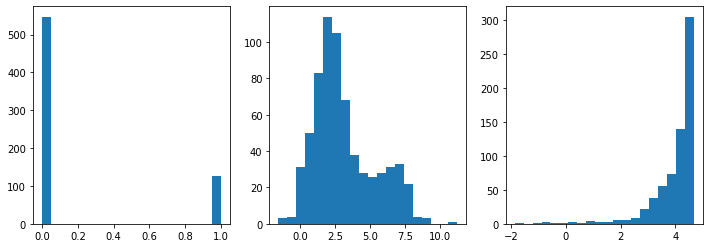

In [11]:
bins=20
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(train['t'], bins=bins)
axs[1].hist(train['y'], bins=bins)
axs[2].hist(train['te'], bins=bins)
plt.show()

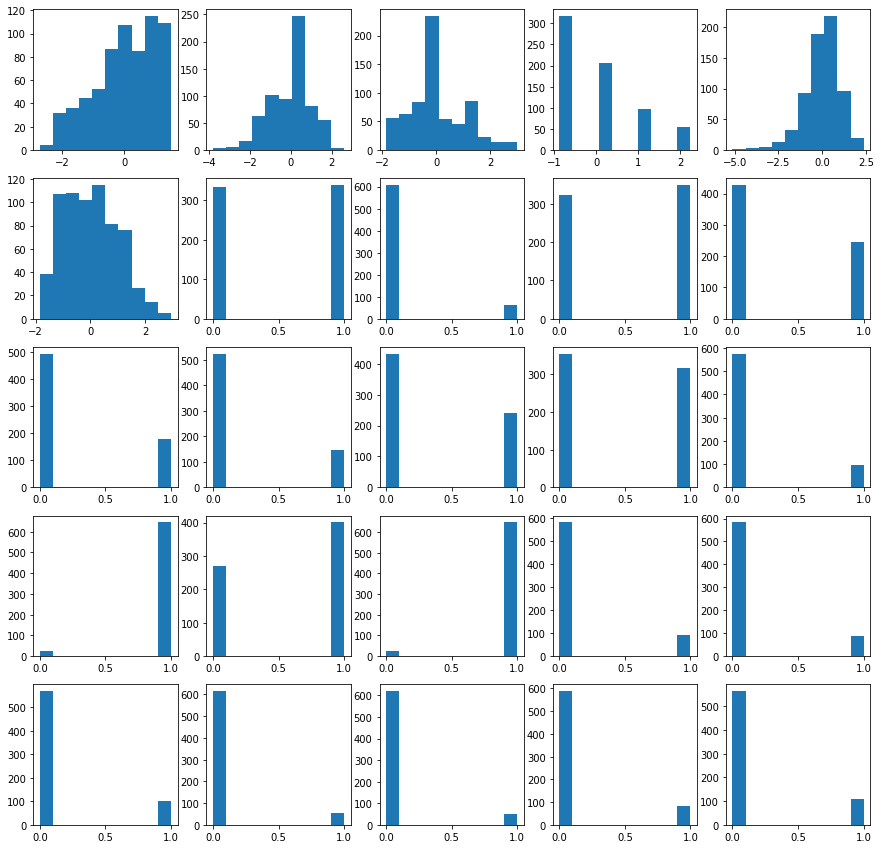

In [12]:
plot_dist(train['x'])

In [14]:
lr = LassoLarsCV()

lr.fit(np.concatenate([train['x'], train['t']], axis=1), train['y'])

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LassoLarsCV()

In [15]:
lr_y0 = lr.predict(np.concatenate([test['x'], np.zeros_like(test['t'])], axis=1))
# Predict Y_1 given [X, 1]
lr_y1 = lr.predict(np.concatenate([test['x'], np.ones_like(test['t'])], axis=1))

In [16]:
lr_cate = lr_y1 - lr_y0

In [17]:
dr = DRLearner(model_propensity=LogisticRegressionCV(), model_regression=LassoLarsCV(), model_final=LassoLarsCV())
dr.fit(train['y'], train['t'], X=train['x'])

dr_cate = dr.effect(test['x'])

The econml.drlearner.DRLearner class has been moved to econml.dr.DRLearner; an upcoming release will remove support for the old name
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

In [18]:
ate_lr = ate_error(lr_cate, test['te'])
ate_dr = ate_error(dr_cate, test['te'])

pehe_lr = pehe_error(lr_cate, test['te'])
pehe_dr = pehe_error(dr_cate, test['te'])

In [19]:
results = []
results.append(['LR', ate_lr, pehe_lr])
results.append(['DR', ate_dr, pehe_dr])

cols = ['Method', 'ATE error', 'PEHE error']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE error,PEHE error
0,LR,0.295835,1.006003
1,DR,0.149759,0.650019
